# **M√ìDULO 27 - Projeto de Doen√ßas Cardiovasculares - Regress√£o Log√≠stica**


Assim como na aula que trabalhamos com uma base de dados nova, com um contexto de modelo de propens√£o a compra de carros, para a atividade de voc√™s achei interessante trazer tamb√©m novos desafios.

Nessa tarefa iremos construir um modelo que nos ajude a prever doen√ßas cardiovasculares, a base cont√©m dados reais.

age - idade dos pacientes

gender - genero (2 mulheres) (1 homens)

height - altura dos pacientes

weight - peso dos pacientes

gluc - glicose

smoke - fumante (1) n√£o fumante (0)

alco - consume alcool (1) n√£o consome (0)

active - realiza atividades fisicas (1) n√£o realiza (0)

cardio_disease - tem doen√ßa cardio (1) n√£o tem (0) - Vari√°vel target


Seu objetivo √© utilizar esses dados hist√≥ricos dos pacientes e construir um bom modelo de regress√£o capaz de indicar se novos pacientes est√£o propensos a doen√ßas cariovasculares ou n√£o.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, classification_report

# 1) Comece carregando e tratando a base de dados.
Assim como na aula essa nova base n√£o passou por pr√© processamento nenhum ent√£o nessa etapa, carrega os dados, verifique os tipos de dados, verifique se temos dados faltantes e outliers.
Quando necess√°rio realize o tratamento.


In [4]:
base = pd.read_csv("CARDIO_BASE.csv", delimiter=';')

In [5]:
# An√°lise Inicial
print(base.info())
print(base.describe())
print(base.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             10000 non-null  int64 
 1   gender          10000 non-null  int64 
 2   height          10000 non-null  int64 
 3   weight          10000 non-null  object
 4   cholesterol     10000 non-null  int64 
 5   gluc            10000 non-null  int64 
 6   smoke           10000 non-null  int64 
 7   alco            10000 non-null  int64 
 8   active          10000 non-null  int64 
 9   cardio_disease  10000 non-null  int64 
dtypes: int64(9), object(1)
memory usage: 781.4+ KB
None
                age        gender        height   cholesterol          gluc  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean      53.288300      1.345400    164.308200      1.365000      1.222200   
std        6.796234      0.475522      8.178796      0.677658      0.5

Por mais que as colunas de altura, peso e glicose possam apresentar um princ√≠pio de outlier, manter esses dados √© essencial, pois representam varia√ß√µes reais e clinicamente relevantes para o modelo.

# 2) Agora √© hora de explorar os dados com uma an√°lise bem completa.
Plote pelo menos 3 gr√°ficos analisando o comportamento da vari√°vel cardio com outras variaveis da sua prefer√™ncia (an√°lise bivariada). N√£o se esque√ßa de trazer insights acerca do analisado.


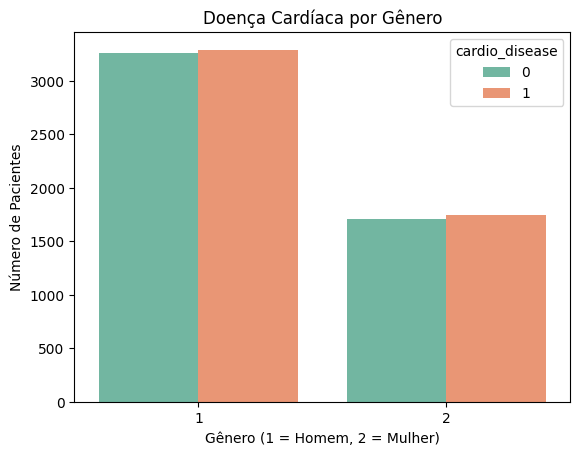

In [6]:
# Distribui√ß√£o por G√™nero

sns.countplot(x='gender', hue='cardio_disease', data=base, palette='Set2')
plt.title('Doen√ßa Card√≠aca por G√™nero')
plt.xlabel('G√™nero (1 = Homem, 2 = Mulher)')
plt.ylabel('N√∫mero de Pacientes')
plt.show()

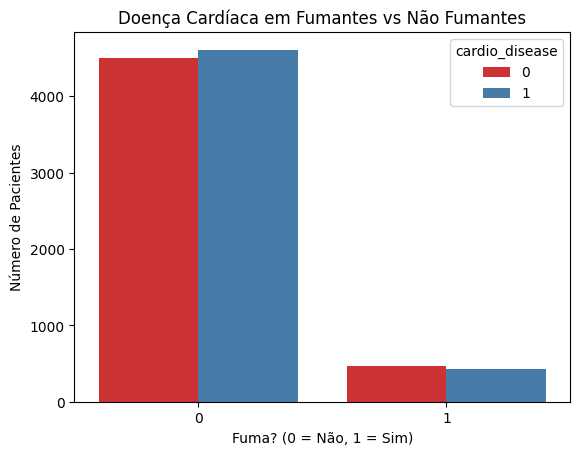

In [7]:
# Distribui√ß√£o entre os fumantes

sns.countplot(x='smoke', hue='cardio_disease', data=base, palette='Set1')
plt.title('Doen√ßa Card√≠aca em Fumantes vs N√£o Fumantes')
plt.xlabel('Fuma? (0 = N√£o, 1 = Sim)')
plt.ylabel('N√∫mero de Pacientes')
plt.show()

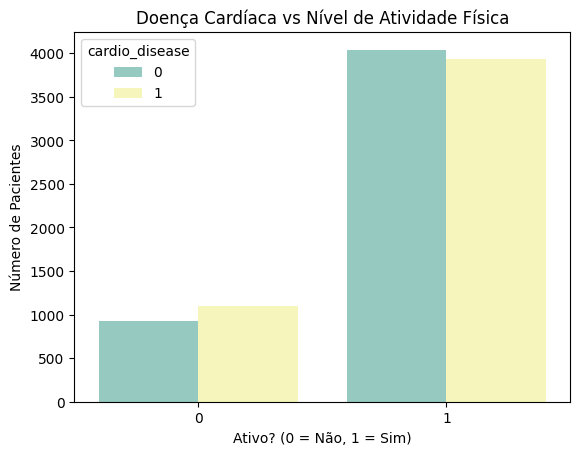

In [8]:
# Distribui√ß√£o entre quem pratica atividade f√≠sica

sns.countplot(x='active', hue='cardio_disease', data=base, palette='Set3')
plt.title('Doen√ßa Card√≠aca vs N√≠vel de Atividade F√≠sica')
plt.xlabel('Ativo? (0 = N√£o, 1 = Sim)')
plt.ylabel('N√∫mero de Pacientes')
plt.show()

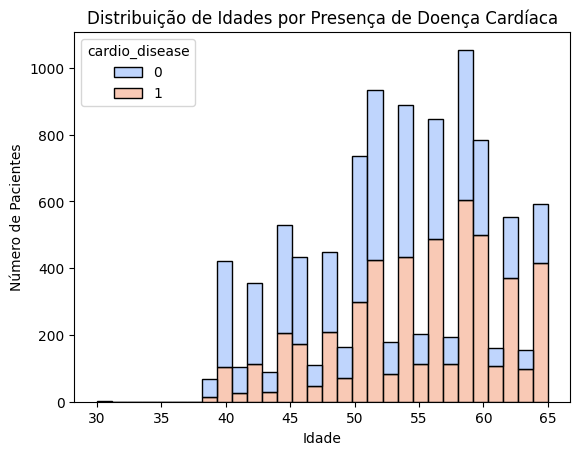

In [9]:
# Distruibui√ß√£o entre a idade e a doen√ßa

sns.histplot(data=base, x='age', hue='cardio_disease', multiple='stack', bins=30, palette='coolwarm')
plt.title('Distribui√ß√£o de Idades por Presen√ßa de Doen√ßa Card√≠aca')
plt.xlabel('Idade')
plt.ylabel('N√∫mero de Pacientes')
plt.show()

# Insights:

1¬∞ Gr√°fico - G√™nero vs. Doen√ßa Card√≠aca: A ocorr√™ncia de doen√ßas cardiovasculares est√° relativamente equilibrada entre os g√™neros, mas com leve predomin√¢ncia entre homens;

2¬∞ Gr√°fico - Fumo vs. Doen√ßa Card√≠aca: Apesar de o n√∫mero de fumantes ser bem menor na amostra, a propor√ß√£o de casos de doen√ßa card√≠aca entre eles √© semelhante √† dos n√£o fumantes. Isso sugere que o tabagismo pode n√£o ser o fator isolado mais determinante;

3¬∞ Gr√°fico - Atividade F√≠sica vs. Doen√ßa Card√≠aca: Pacientes ativos apresentaram menor incid√™ncia de doen√ßas card√≠acas, refor√ßando que h√°bitos f√≠sicos regulares t√™m papel protetivo. A diferen√ßa entre os grupos sugere uma tend√™ncia clara: sedentarismo pode estar associado a maior risco cardiovascular.


4¬∞ Gr√°fico - Idade vs. Doen√ßa Card√≠aca: Com o avan√ßo da idade, aumenta tamb√©m a propor√ß√£o de pacientes com doen√ßa card√≠aca, especialmente ap√≥s os 50 anos, onde o n√∫mero de casos positivos supera o de negativos. Isso refor√ßa a idade como fator de risco importante.

# 3) Nessa etapa voc√™ deve trazer a matriz de correla√ß√£o e apontar insights acerca das vari√°veis com um relacionamento mais forte entre si.



In [10]:
# Essa troca foi necess√°ria pois estava dando erro de string

for col in base.columns:
    if base[col].dtype == 'object':
        try:
            base[col] = base[col].str.replace(',', '.').astype(float)
        except:
            pass

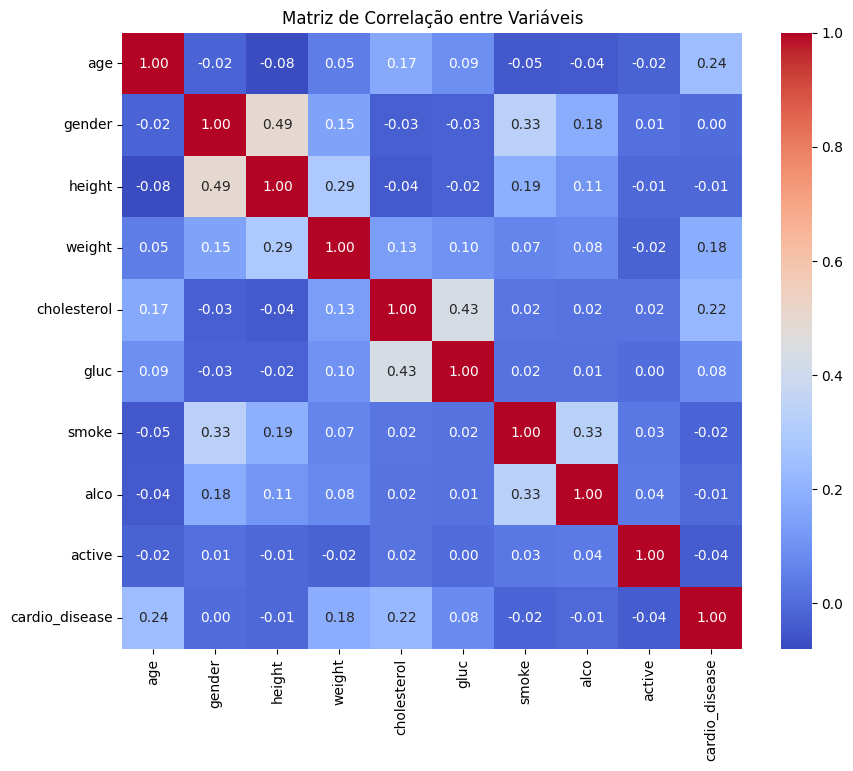

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(base.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Matriz de Correla√ß√£o entre Vari√°veis')
plt.show()

# An√°lise:

- Idade tem uma correla√ß√£o moderada com 'cardio_disease', refor√ßando que o risco cardiovascular aumenta com o tempo;

- Peso e Altura est√£o fortemente correlacionados entre si, vistoque s√£o propor√ß√µes relacionadas.

- Glucose tamb√©m apresenta alguma associa√ß√£o com doen√ßas card√≠acas, poss√≠vel liga√ß√£o com diabetes.

- Mas o principal √© o cruzamento entre altura e g√™nero, o que √© esperado, visto que na m√©dia, homens s√£o mais alto do que mulheres.

# 4) Essa √© a sua √∫ltima etapa pr√© modelo. Voc√™ deve:

A) Separar a base em treino e teste.

B) Voc√™ considera que essa base precisa que os dados sejam padronizados? Se sim, porque? Se acredita que devem, ent√£o realize essa etapa.

C) Verifique se os dados est√£o balanceados, se n√£o, fa√ßa o balanceamento.


D) Visualize as bases de treino, teste (X E Y) e verifique se est√° tudo adequado.

In [12]:
# A)
X = base.drop('cardio_disease', axis=1)
y = base['cardio_disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
#B)
# Algumas colunas necessitam de padroniza√ß√£o em seus dados, para facilitar no momento da regress√£o
# Colunas que precisam de padroniza√ß√£o
num_cols = ['age', 'height', 'weight', 'gluc']

# Padronizando
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

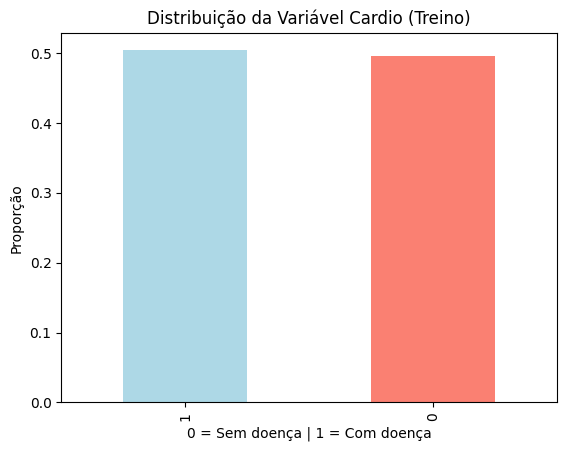

In [14]:
# C) Est√£o Balanceadors
y_train.value_counts(normalize=True).plot(kind='bar', title='Distribui√ß√£o da Vari√°vel Cardio (Treino)', color=['lightblue', 'salmon'])
plt.xlabel('0 = Sem doen√ßa | 1 = Com doen√ßa')
plt.ylabel('Propor√ß√£o')
plt.show()

In [15]:
# D)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

print("\nüîé Exemplo de X_train:")
print(X_train.head())

print("\nüéØ Exemplo de y_train:")
print(y_train.head())

X_train shape: (8000, 9)
X_test shape: (2000, 9)
y_train shape: (8000,)
y_test shape: (2000,)

üîé Exemplo de X_train:
           age  gender    height    weight  cholesterol      gluc  smoke  \
9254  0.100380       1 -1.256107  0.321506            1 -0.392723      0   
1561 -0.193935       2  0.088091 -0.640578            1 -0.392723      0   
1670  1.424796       1 -0.278509 -0.090816            1 -0.392723      0   
6087  1.277639       2  1.065689  1.764633            1 -0.392723      1   
6669  1.277639       1 -0.034109  0.252786            1 -0.392723      0   

      alco  active  
9254     0       1  
1561     0       1  
1670     0       0  
6087     0       1  
6669     0       1  

üéØ Exemplo de y_train:
9254    0
1561    0
1670    1
6087    1
6669    0
Name: cardio_disease, dtype: int64


# An√°lise:

Tudo indo como o esperado at√© agora

# 5) Realize a etapa de treinamento do modelo:

A) Fa√ßa o treinamento do modelo.

B) Traga o intercept e os coeficientes.

c) Avalie as m√©tricas do modelo treinado

D) Justifique se te parece que o modelo tem feito boas previs√µes ou n√£o.

In [16]:
# A)

logistic_cardio = LogisticRegression(random_state = 0)
logistic_cardio.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [19]:
# B)

logistic_cardio.intercept_


array([-0.66262743])

In [20]:
logistic_cardio.coef_

array([[ 0.44191094,  0.02263628, -0.07857154,  0.35163962,  0.60209098,
        -0.06962615, -0.09616967, -0.03039666, -0.18825054]])

In [22]:
# C)

previsoes = logistic_cardio.predict(X_test)
relatorio = classification_report(y_test, previsoes)
print("Relat√≥rio de Classifica√ß√£o:")
print(relatorio)

Relat√≥rio de Classifica√ß√£o:
              precision    recall  f1-score   support

           0       0.64      0.69      0.67      1001
           1       0.67      0.62      0.64       999

    accuracy                           0.65      2000
   macro avg       0.66      0.65      0.65      2000
weighted avg       0.66      0.65      0.65      2000



# D)

Com base nas m√©tricas acima, o modelo demonstra potencial de previs√£o, mas ainda possui margem de melhoria.

# 6) Teste seu modelo!

A) Aplique o modelo aos dados de teste.

B) Avalie as m√©tricas do modelo treinado

C) Plote o gr√°fico da curva AUC-ROC e explique o que consegue analisar atrav√©s do gr√°fico.

In [23]:
# A)

previsoes_teste = logistic_cardio.predict(X_test)

In [24]:
# B)

relatorio_teste = classification_report(y_test, previsoes_teste)
print("Relat√≥rio de Classifica√ß√£o (Teste):")
print(relatorio_teste)

Relat√≥rio de Classifica√ß√£o (Teste):
              precision    recall  f1-score   support

           0       0.64      0.69      0.67      1001
           1       0.67      0.62      0.64       999

    accuracy                           0.65      2000
   macro avg       0.66      0.65      0.65      2000
weighted avg       0.66      0.65      0.65      2000



In [25]:
# C)
fpr, tpr, thresholds = roc_curve(y_test, previsoes_teste)

# Calculando AUC
roc_auc = roc_auc_score(y_test, previsoes_teste)
print("AUC: {:.2f}".format(roc_auc))

AUC: 0.65


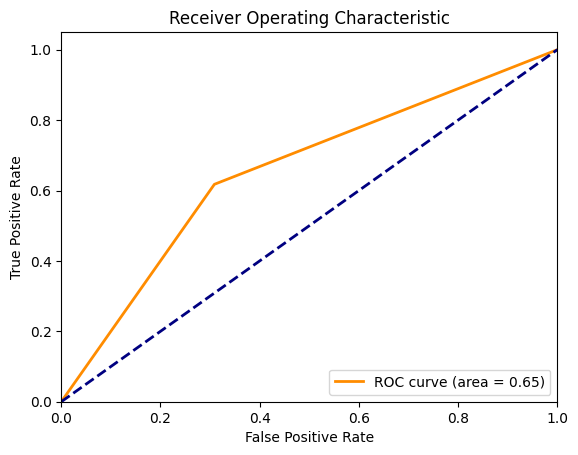

In [26]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Linha de refer√™ncia
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# An√°lise:

A curva ROC mostra que o modelo tem desempenho m√©dio, com o AUC de 0.65. Abrindo possibilidades para aprimoramentos futuros.

# 7) Explique:

A) Explique com suas palavras regress√£o logistica.

Resposta: A Regress√£o Log√≠stica √© usada para prever se algo vai acontecer ou n√£o, com op√ß√µes bin√°rias, como sim ou n√£o. Ela d√° um resultado entre 0 e 1, mostrando a chance de isso acontecer.

B) Explique porque a regress√£o logistica √© um modelo de classifica√ß√£o.

Resposta: √â um modelo de classifica√ß√£o porque seu objetivo √© separar os dados em categorias, como "sim" ou "n√£o", "positivo" ou "negativo". Mesmo calculando uma probabilidade, no fim ela classifica o resultado em uma das classes.

C) Explique quais pontos em comum a regress√£o logistica tem da regress√£o linear.

Resposta: A Regress√£o Log√≠stica se parece com a Linear porque as duas tentam mostrar como uma coisa influencia a outra. A diferen√ßa √© que a Linear d√° um n√∫mero como resposta, e a Log√≠stica mostra a chance de algo acontecer, como sim ou n√£o.
